<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np, cv2
import matplotlib.pyplot as plt

a = np.random.randint(0,150,(25,2))
b = np.random.randint(128,255,(25,2))

data = np.vstack((a,b))
data = data.astype(np.float32)

In [2]:
data

array([[ 23.,  83.],
       [139., 116.],
       [ 47., 145.],
       [122., 109.],
       [139.,  91.],
       [  2.,  85.],
       [ 64.,  89.],
       [ 36.,  98.],
       [135.,  92.],
       [119.,  69.],
       [ 20.,  85.],
       [ 38.,  31.],
       [ 30.,  75.],
       [ 91., 105.],
       [103., 138.],
       [109., 128.],
       [108., 114.],
       [ 97., 110.],
       [ 82.,  54.],
       [ 54.,   0.],
       [ 68.,   3.],
       [117.,  19.],
       [ 24., 121.],
       [ 45., 140.],
       [125.,  11.],
       [254., 189.],
       [151., 216.],
       [254., 195.],
       [140., 149.],
       [167., 206.],
       [140., 178.],
       [184., 226.],
       [233., 142.],
       [194., 157.],
       [151., 191.],
       [128., 246.],
       [149., 217.],
       [206., 192.],
       [150., 215.],
       [203., 229.],
       [169., 249.],
       [198., 196.],
       [204., 172.],
       [254., 253.],
       [215., 184.],
       [143., 151.],
       [137., 205.],
       [168.,

* `cv2.TERM_CRITERIA_EPS`는 주어진 정확도(`epsilon` 인자)에 도달하면 반복을 중단
* `cv2.TERM_CRITERIA_MAX_ITER`는 `max_iter` 인자에 지정된 횟수만큼 반복하고 중단
* `cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER`는 두가지 조건 중 하나가 만족되면 반복이 중단.

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [0]:
ret, label, centers = cv2.kmeans(data, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
red = data[label.ravel()==0]
blue = data[label.ravel()==1]

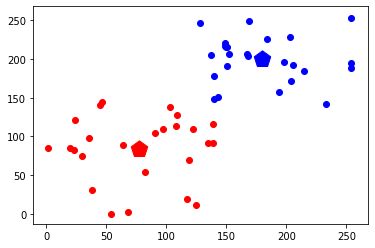

In [11]:
plt.scatter(red[:,0], red[:,1], c='r')
plt.scatter(blue[:,0], blue[:,1], c='b')

# https://matplotlib.org/api/markers_api.html#module-matplotlib.markers : 마커 종류.
plt.scatter(centers[0,0], centers[0,1], s=300, c='r', marker='p')
plt.scatter(centers[1,0], centers[1,1], s=300, c='b', marker='p')

plt.show()

In [14]:
from google.colab import files
uploaded = files.upload()


Saving taekwonv1.jpg to taekwonv1.jpg


shape of centers: (2, 3)
[[100  77  60]
 [194 197 196]]
shape of labels: (177600, 1)
shape of res: (177600, 3)


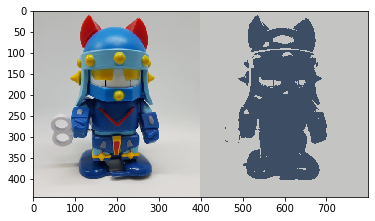

In [19]:
K = 2

img = cv2.imread('./taekwonv1.jpg')

data = img.reshape((-1,3)).astype(np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret, labels,centers = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
print('shape of centers:',centers.shape)
print(centers)
print('shape of labels:',labels.shape)

res = centers[labels.flatten()]
print('shape of res:',res.shape)
res = res.reshape((img.shape))

merged = np.hstack((img,res))

merged = merged[:,:,::-1]
plt.imshow(merged)
plt.show()

In [20]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


In [0]:
import numpy as np, cv2

data = None  # 이미지 데이타 셋 
k = list(range(10)) # [0,1,2,3,4,5,6,7,8,9] 레이블 셋

# 이미지 데이타 읽어들이는 함수 ---①
def load():
    global data
    # 0~9 각각 500(5x100)개, 총5000(50x100)개, 한 숫자당 400(20x20)픽셀
    image = cv2.imread('./digits.png')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # 숫자 한개(20x20)씩 구분하기 위해 행별(50)로 나누고 열별(100)로 나누기
    cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
    # 리스트를 NumPy 배열로  변환 (50 x 100 x 20 x 20 )
    data = np.array(cells)

# 모든 숫자 데이타 반환 ---②
def getData(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 모든 데이타를 N x 400 형태로 변환
    if reshape:
        full = data.reshape(-1, 400).astype(np.float32) # 5000x400
    else:
        full = data
    labels = np.repeat(k,500).reshape(-1,1)  # 각 숫자당 500번 반복(10x500)
    return (full, labels)

# 훈련용 데이타 반환 ---③
def getTrain(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 50x100 중에 90열만 훈련 데이타로 사용
    train = data[:,:90]
    if reshape:
        # 훈련 데이타를 N X 400으로 변환
        train = train.reshape(-1,400).astype(np.float32) # 4500x400
    # 레이블 생성
    train_labels = np.repeat(k,450).reshape(-1,1) # 각 숫자당 45번 반복(10x450)
    return (train, train_labels)

# 테스트용 데이타 반환 ---④
def getTest(reshape=True):
    if data is None: load()
    # 50x100 중에 마지막 10열만 훈련 데이타로 사용
    test = data[:,90:100]
    # 테스트 데이타를 N x 400으로 변환
    if reshape:
        test = test.reshape(-1,400).astype(np.float32) # 500x400
    test_labels = np.repeat(k,50).reshape(-1,1)
    return (test, test_labels)


# 손글씨 숫자 한 개를 20x20 로 변환후에 1x400 형태로 변환 ---⑤
def digit2data(src, reshape=True):
    h, w = src.shape[:2]
    square = src
    # 정사각형 형태로 만들기
    if h > w:
        pad = (h - w)//2
        square = np.zeros((h, h), dtype=np.uint8)
        square[:, pad:pad+w] = src
    elif w > h :
        pad = (w - h)//2
        square = np.zeros((w, w), dtype=np.uint8)
        square[pad:pad+h, :] = src
    # 0으로 채워진 20x20 이미지 생성
    px20 = np.zeros((20,20), np.uint8)
    # 원본을 16x16으로 축소해서 테두리 2픽셀 확보
    px20[2:18, 2:18] = cv2.resize(square, (16,16), interpolation=cv2.INTER_AREA)
    if reshape:
        # 1x400형태로 변환
        px20 = px20.reshape((1,400)).astype(np.float32)
    return px20


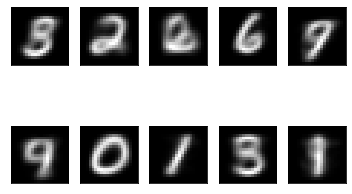

In [24]:
import cv2, numpy as np
import matplotlib.pyplot as plt

data, _ = getData()

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.)

ret, labels, centers = cv2.kmeans(data, 10, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

for i in range(10):
  cent_img = centers[i].reshape(20,20).astype(np.uint8)
  plt.subplot(2,5, i+1)
  plt.imshow(cent_img, cmap='gray')
  plt.xticks([]), plt.yticks([])
plt.show()